In [7]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

In [8]:
df = pd.read_csv("Online_Retail.csv", delimiter=",", encoding="latin1")

In [9]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


In [10]:
colonnes_essentielles = ['InvoiceNo', 'Description', 'CustomerID', 'Country']
df_filtre = df.dropna(subset=colonnes_essentielles)


In [11]:
df_filtre.shape

(406829, 8)

In [12]:
# Supprimer les transactions avec des valeurs négatives dans 'Quantity'
df_filtre = df_filtre[(df_filtre['Quantity'] > 0)]


In [13]:
df_filtre

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


In [14]:
df_filtre_france = df_filtre[(df_filtre['Country'] == 'France')]

In [15]:
df_filtre_france.shape

(8342, 8)

In [16]:
df_filtre_uk = df_filtre[(df_filtre['Country'] == 'United Kingdom')]

In [17]:
df_filtre_uk.shape

(354345, 8)

In [18]:
df_filtre.shape

(397924, 8)

In [19]:
#transformation des données en table binaire où chaque ligne représente une transaction et 
#chaque colonne un produit (1 : produit acheté dans la transaction, 0 : produit non acheté)
table_binaire = pd.crosstab(df_filtre['InvoiceNo'], df_filtre['StockCode'])
table_binaire[table_binaire > 0] = 1

In [20]:
table_binaire

StockCode,10002,10080,10120,10123C,10124A,10124G,10125,10133,10135,11001,...,90214V,90214W,90214Y,90214Z,BANK CHARGES,C2,DOT,M,PADS,POST
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581583,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581584,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
581585,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
def AprioriFunc(data, min_support=0.01):
    frequent_itemsets = apriori(data, min_support=min_support, use_colnames=True)
    return frequent_itemsets

In [22]:
frequent_itemsets = AprioriFunc(table_binaire, min_support=0.01)


c:\Users\flori\anaconda3\envs\jpn_ipsa\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [23]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)

In [24]:
filtered_rules = rules[(rules['lift'] >= 1) & (rules['confidence'] >= 0.2)]
print(filtered_rules.sort_values('lift', ascending=False).head())


        antecedents     consequents  antecedent support  consequent support  \
464         (23172)         (23171)            0.012085            0.014566   
465         (23171)         (23172)            0.014566            0.012085   
923         (22746)  (22745, 22748)            0.013595            0.013703   
920  (22745, 22748)         (22746)            0.013703            0.013595   
471         (23175)         (23174)            0.014674            0.014458   

      support  confidence       lift  leverage  conviction  zhangs_metric  
464  0.010898    0.901786  61.909259  0.010722   10.033507       0.995882  
465  0.010898    0.748148  61.909259  0.010722    3.922605       0.998390  
923  0.010035    0.738095  53.863517  0.009848    3.765861       0.994961  
920  0.010035    0.732283  53.863517  0.009848    3.684512       0.995070  
471  0.011114    0.757353  52.381694  0.010901    4.061626       0.995518  


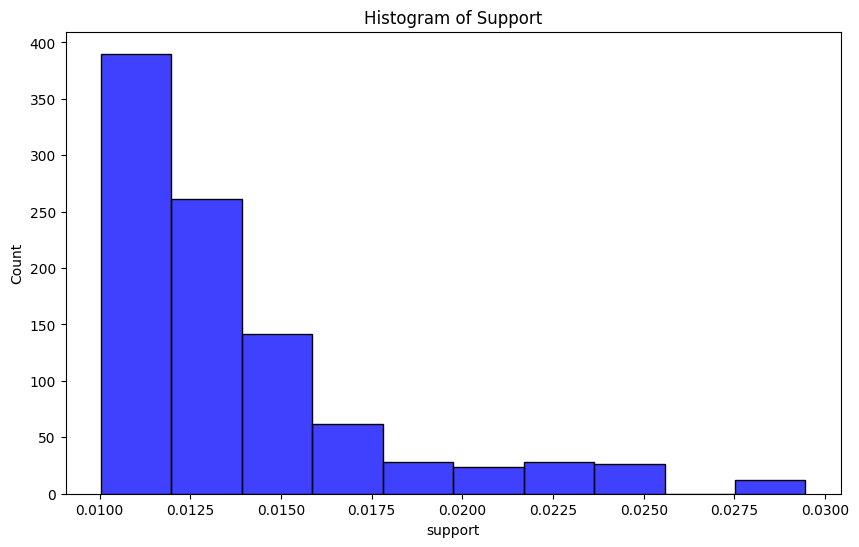

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(rules['support'], bins=10, color='blue')
plt.title('Histogram of Support')
plt.show()
